### Importación de datos



In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#estas serían las URLs de los archivos csv que debo analizar
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

#aquí se cargarían los archivos. Por lo que tengo 4 variables
tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()
#ahora debería revisar bien los datos de ls csv de cada tienda, que se verían como se muestra a continuación
#este  head me permite ver los títulos de las cabeceras




,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


    Cada archivo de tienda contiene las siguientes columnas:
*producto    

*categoría del producto

*precio

*costo del envío

*fecha de compra

*vendedor

*lugar de compra

*calificación

*método de pago

*cantidad de cuotas

*lat (coordenadas de latitud)

*lon (coordenadas de longitud

#1. Análisis de facturación



  Ahora,para poder analizar he unido todo en un único DataFrame.
  He Agregado una columna para indicar de cuál tienda provienen los datos

In [175]:
tienda["Tienda"] = "Tienda 1"
tienda2["Tienda"] = "Tienda 2"
tienda3["Tienda"] = "Tienda 3"
tienda4["Tienda"] = "Tienda 4"

df_total = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

#el parámetro ignore_index=True se usa comúnmente al concatenar o agregar dataframes,
#y significa que se debe ignorar los índices originales
#y crear un nuevo índice consecutivo para el resultado

In [176]:
#ahora muestro cómo se ven todos los datos unificados
df_total.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


In [178]:
#así se verían las tablas
#print(df_total)
display(df_total)

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de comedor,Muebles,227700.0,12600.0,12/02/2020,Camila Rivera,Medellín,5,Tarjeta de crédito,1,6.25184,-75.56359,Tienda 4
9431,Silla de oficina,Muebles,342000.0,18600.0,17/05/2022,Felipe Santos,Bucaramanga,5,Tarjeta de crédito,3,7.12539,-73.11980,Tienda 4
9432,Vaso térmico,Deportes y diversión,36700.0,2400.0,03/05/2022,Camila Rivera,Bogotá,5,Tarjeta de crédito,1,4.60971,-74.08175,Tienda 4
9433,Set de ollas,Artículos para el hogar,151800.0,8300.0,15/06/2020,Blanca Ramirez,Cali,5,Tarjeta de crédito,1,3.43722,-76.52250,Tienda 4


En este primer análisis, calculo el ingreso total de cada tienda.

Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.

In [180]:
#creo una nueva columna Ingreso por venta (precio + costo de envio)
df_total["Ingreso Total"] = df_total["Precio"] + df_total["Costo de envío"]

# Agrupar por tienda y sumar ingresos
ingresos_por_tienda = df_total.groupby("Tienda")["Ingreso Total"].sum().sort_values(ascending=False)

# Mostrar resultados
print(ingresos_por_tienda)
# Convertir ingresos a millones
ingresos_millones = ingresos_por_tienda / 1e6
#uso display para que me muestre como tabla





Tienda
Tienda 1    1.212258e+09
Tienda 2    1.175829e+09
Tienda 3    1.156536e+09
Tienda 4    1.093693e+09
Name: Ingreso Total, dtype: float64


In [181]:
display(ingresos_millones)
#Pero no me gusta la visualización así que para el gráfico lo pasaré a millones:

,Ingreso Total
Tienda,
Tienda 1,1212.2583
Tienda 2,1175.8286
Tienda 3,1156.5362
Tienda 4,1093.6931


Ahora realizo el gráfico. Utilizo uno de columnas:

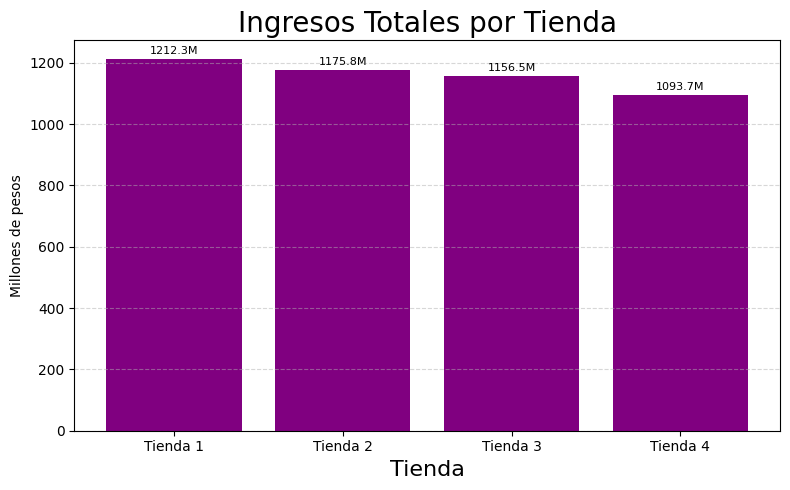

In [187]:


# Creo un gráfico de barras con estilo
plt.figure(figsize=(8, 5))
bars = plt.bar(ingresos_millones.index, ingresos_millones.values, color='purple')

# y hago que me muestre los  valores encima de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10, f"{yval:.1f}M", ha='center', va='bottom', fontsize=8)

# completo con el título y las etiquetas
plt.title("Ingresos Totales por Tienda", fontsize=20)
plt.ylabel("Millones de pesos")
plt.xlabel("Tienda", fontsize=16)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**¿Por qué gráfico de columnas para los ingresos por tienda?**

a.- Comparación directa entre categorías

Quiero comparar fácilmente cuánto ingresó cada tienda. Las columnas permiten ver claramente cuál tienda generó más ingresos y en qué orden.

b.-Categorías discretas

Las tiendas son categorías discretas, o sea que no son valores numéricos continuos. Para datos categóricos, los gráficos de columnas son los más adecuados.

c.-Fácil de leer

Es muy visual: en un vistazo sabes quién va ganando y por cuánto.

d.-Escalabilidad
columnas seguirían siendo útiles. Incluso podría cambiar a barras horizontales si fueran muchas.

# 2. Ventas por categoría

En este calculo la cantidad de productos vendidos por categoría en cada tienda.

 La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [183]:
#Primero agrupo por la columna "Categoría del producto" y recién sumo los igresos

ventas_categoria = df_total.groupby("Categoría del Producto")["Ingreso Total"].sum().sort_values(ascending=False)
print(ventas_categoria)
#esto me dice cuáles categorías son las que generan más dinero.

Categoría del Producto
Electrónicos               1.749039e+09
Electrodomésticos          1.395147e+09
Muebles                    7.981114e+08
Instrumentos musicales     3.672769e+08
Deportes y diversión       1.506693e+08
Juguetes                   7.762570e+07
Artículos para el hogar    6.069090e+07
Libros                     3.975600e+07
Name: Ingreso Total, dtype: float64


Tengo 8 categorías, así que para una mejor visualización debo continuar con un gráfico de barras.


In [184]:

# Convierto a millones como en el primer análisis
ventas_categoria_millones = ventas_categoria / 1e6
display(ventas_categoria_millones)

,Ingreso Total
Categoría del Producto,
Electrónicos,1749.0386
Electrodomésticos,1395.1474
Muebles,798.1114
Instrumentos musicales,367.2769
Deportes y diversión,150.6693
Juguetes,77.6257
Artículos para el hogar,60.6909
Libros,39.7560


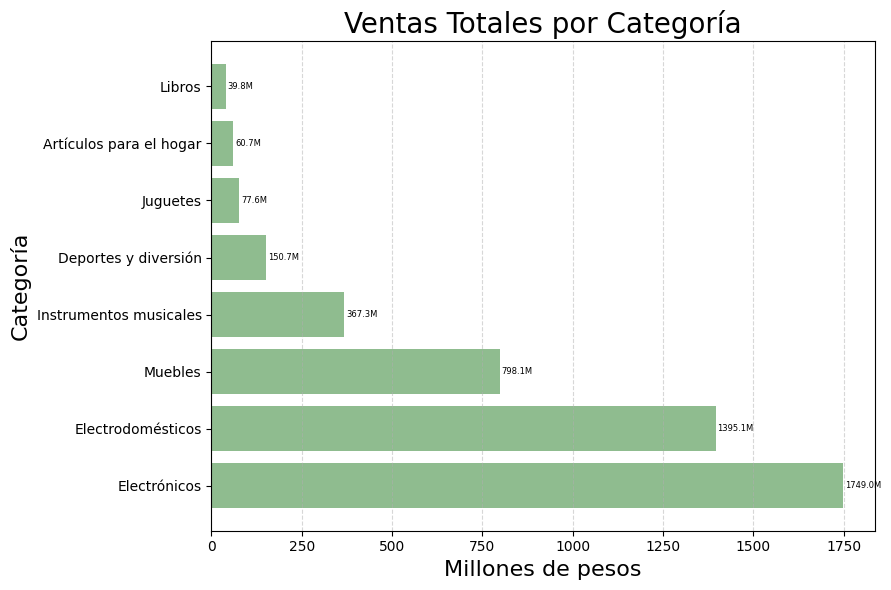

In [188]:

# para un gráfico de barras horizontal
plt.figure(figsize=(9, 6))
bars = plt.barh(ventas_categoria_millones.index, ventas_categoria_millones.values, color='darkseagreen')

# Agrego los  valores al lado de las barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f"{width:.1f}M", va='center', fontsize=6)

# le pongo los títulos y las etiquetas
plt.title("Ventas Totales por Categoría", fontsize=20)
plt.xlabel("Millones de pesos", fontsize=16)
plt.ylabel("Categoría", fontsize=16)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


Para mostrar la participación de cada categoría en el total, uso como segunda opción un gráfico circular que es muy visual.

Es una buena opción complementaria para una presentación o un dashboard, pero no reemplaza al gráfico de barras anterior cuando se quiere hacer un análisis comparativo serio.

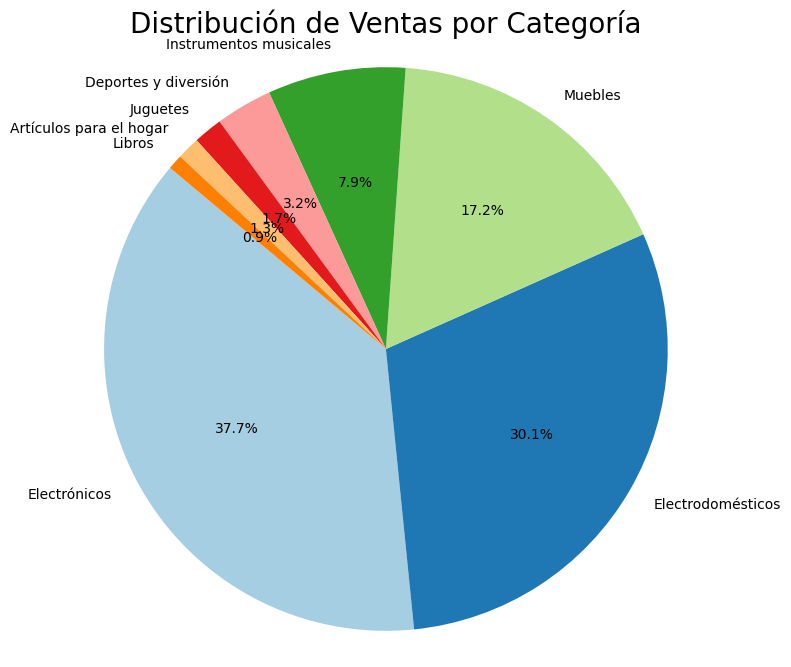

In [189]:
#si hubiese usado un gráfico circular, no se pueden comparar bien los tamaños que están cercanos

ventas_categoria_millones = ventas_categoria / 1e6

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(ventas_categoria_millones, labels=ventas_categoria_millones.index,
        autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)

# Título
plt.title("Distribución de Ventas por Categoría", fontsize=20)
plt.axis('equal')  # Hace que se vea circular
plt.show()


# 3. Calificación promedio de la tienda


En este paso, calculo las calificaciones promedio de los clientes para cada tienda.

 El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [190]:
#Cada venta tiene una columna "Calificación" con la nota que el cliente ha dado al producto.

#Básicamente me dice cuál de las 4 tiendas tiene clientes más satisfechos, en promedio.
# Para calcular la calificación promedio por tienda

calificacion_promedio = df_total.groupby("Tienda")["Calificación"].mean().sort_values(ascending=False)

# Muestro los resultados
display(calificacion_promedio)


,Calificación
Tienda,
Tienda 3,4.048326
Tienda 2,4.037304
Tienda 4,3.995759
Tienda 1,3.976685


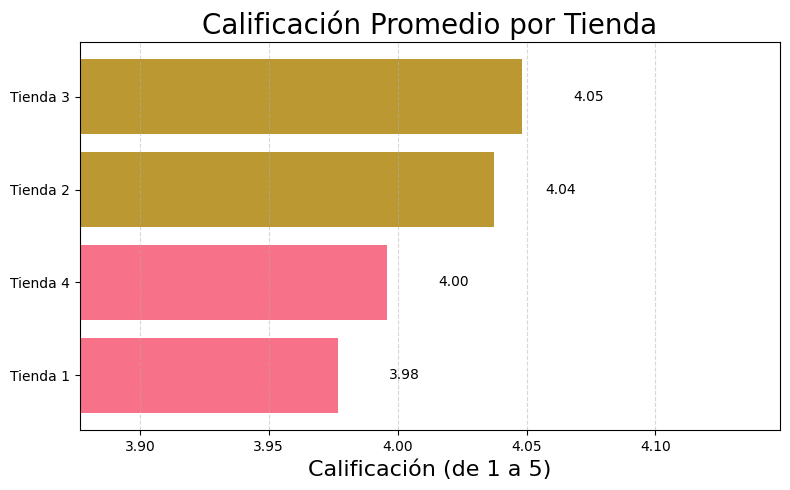

In [191]:
#no empiezo de cero, ya que sino no se vería mucho la diferencia entre uno y otro

plt.figure(figsize=(8, 5))
bars = plt.barh(calificacion_ordenada.index, calificacion_ordenada.values, color=colores)

for bar in bars:
    xval = bar.get_width()
    plt.text(xval + 0.02, bar.get_y() + bar.get_height()/2, f"{xval:.2f}", va='center')

plt.title("Calificación Promedio por Tienda", fontsize=20)
plt.xlabel("Calificación (de 1 a 5)", fontsize=16)

# ¡Aquí está la clave!
plt.xlim(calificacion_ordenada.min() - 0.1, calificacion_ordenada.max() + 0.1)

plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()





# 4. Productos más y menos vendidos

En este paso,identifico qué productos fueron los más vendidos y los menos vendidos en cada tienda.

Visualizo los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [192]:
#Para saber cuáles productos se venden más, necesito contar cuántas veces aparece cada producto en el dataset.

productos_mas_vendidos = df_total["Producto"].value_counts().head(10)

# Muestro solo los 10 más vendidos
display(productos_mas_vendidos)



,count
Producto,
Mesa de noche,210
Carrito de control remoto,206
Microondas,206
Batería,203
Cama king,201
Secadora de ropa,200
Modelado predictivo,200
Set de ollas,200
Cama box,199


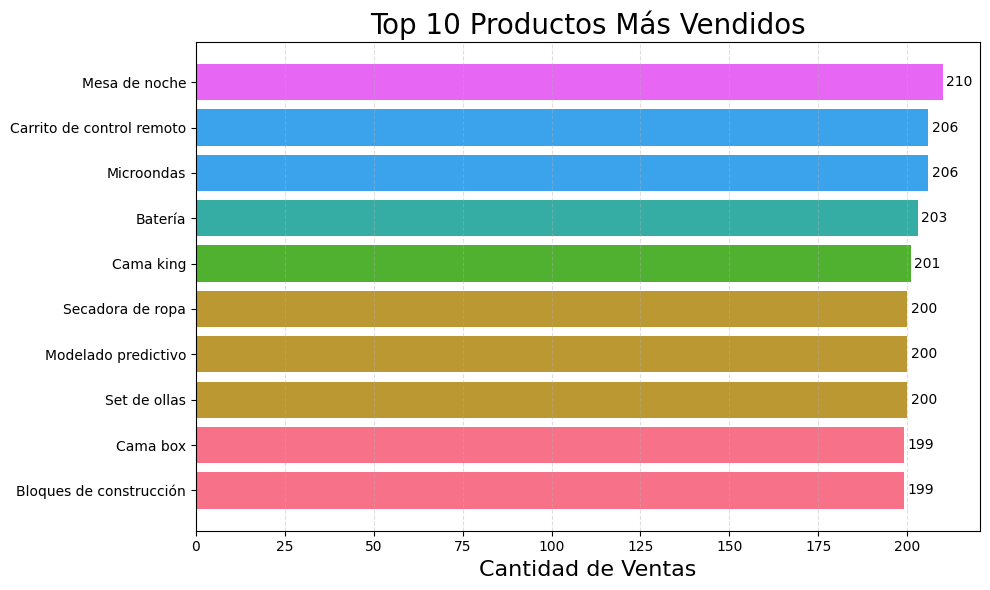

In [193]:
#hay muchos empates entre los más vendidos, así que se hace di´ficil no usar barras otra vez
#así que pondré colores

# Obtener productos ordenados
productos = productos_mas_vendidos[::-1]
valores = productos.values

# Creo prinero una lista de colores únicos para cada valor
valores_unicos = list(dict.fromkeys(valores))  # Conserva orden
palette = sns.color_palette("husl", len(valores_unicos))  # Paleta colorida
color_map = {val: palette[i] for i, val in enumerate(valores_unicos)}

# Asigno un color por valor
colores = [color_map[val] for val in valores]

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(productos.index, valores, color=colores)

# Etiquetas
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f"{width}", va='center', fontsize=10)

# títulos
plt.title("Top 10 Productos Más Vendidos", fontsize=20)
plt.xlabel("Cantidad de Ventas", fontsize=16)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()



Ahora veamos los productos menos vendidos

In [194]:
# Contar cantidad de ventas por producto y tomar los 10 con menos ventas
productos_menos_vendidos = df_total["Producto"].value_counts().sort_values().head(10)

# Verificamos el resultado
display(productos_menos_vendidos)


,count
Producto,
Celular ABXY,157
Auriculares con micrófono,158
Mochila,163
Guitarra eléctrica,165
Ciencia de datos con Python,166
Asistente virtual,167
Sillón,168
Set de vasos,169
Olla de presión,172


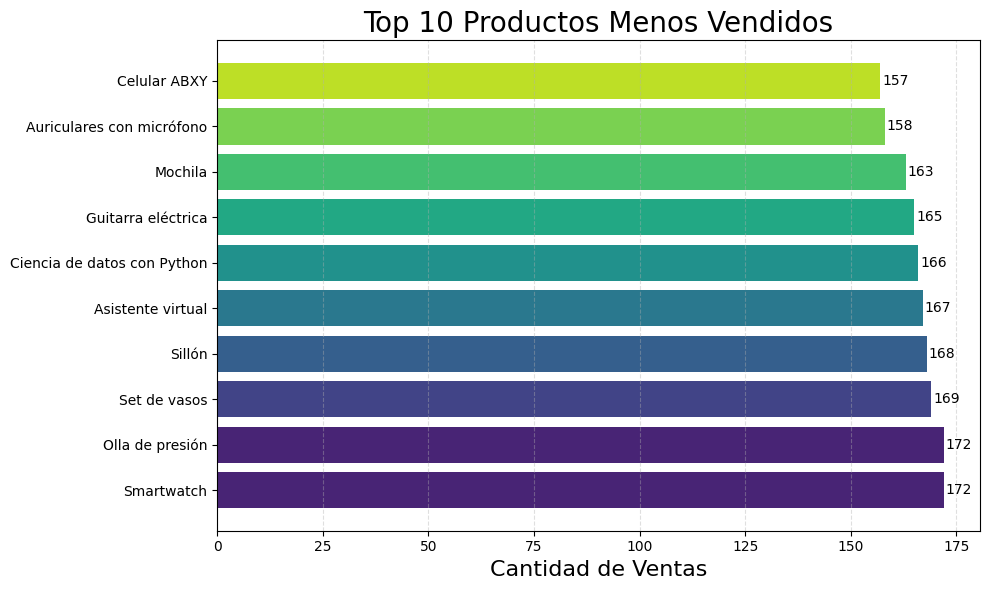

In [195]:
# Preparo los datos  para barras horizontales
productos = productos_menos_vendidos[::-1]
valores = productos.values

# Colores únicos para cada valor
valores_unicos = list(dict.fromkeys(valores))
palette = sns.color_palette("viridis", len(valores_unicos))
color_map = {val: palette[i] for i, val in enumerate(valores_unicos)}

# Asigno color por valor
colores = [color_map[val] for val in valores]

# Gráfico de barras
plt.figure(figsize=(10, 6))
bars = plt.barh(productos.index, valores, color=colores)

# Etiquetas
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             f"{width}", va='center', fontsize=10)

# Estilo del gráfico
plt.title("Top 10 Productos Menos Vendidos", fontsize=20)
plt.xlabel("Cantidad de Ventas", fontsize=16)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()


# 5. Envío promedio por tienda

Finalmente, calculo el costo de envío promedio para cada tienda.

El objetivo es comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [196]:
# Calcular el costo promedio de envío por tienda
costo_envio_promedio = df_total.groupby("Tienda")["Costo de envío"].mean().sort_values()

# Mostrar resultado
display(costo_envio_promedio)



,Costo de envío
Tienda,
Tienda 4,23459.457167
Tienda 3,24805.680373
Tienda 2,25216.235693
Tienda 1,26018.609580


Uso un gráfico de líneas con seaborn.

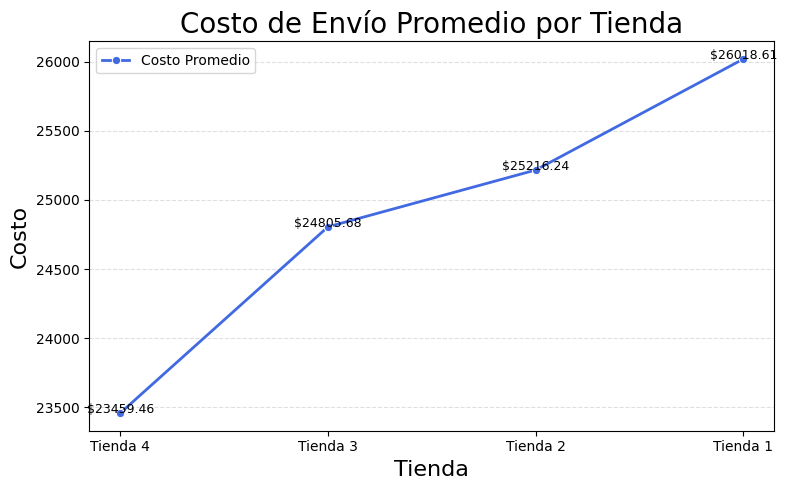

In [199]:
# Convertir a DataFrame para Seaborn
df_envio = costo_envio_promedio.reset_index()
df_envio.columns = ['Tienda', 'Costo']

plt.figure(figsize=(8, 5))
sns.lineplot(data=df_envio, x='Tienda', y='Costo', marker='o', color='royalblue', linewidth=2, label='Costo Promedio')

# Etiquetas sobre los puntos
for i in range(len(df_envio)):
    plt.text(i, df_envio['Costo'][i] + 1, f"${df_envio['Costo'][i]:.2f}", ha='center', fontsize=9)

# Estética
plt.title("Costo de Envío Promedio por Tienda", fontsize=20)
plt.ylabel("Costo", fontsize=16)
plt.xlabel("Tienda", fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.legend()
plt.show()


# **Informe final de Recomendación**


---


Con base en los análisis realizados y los gráficos generados, es momento de sintetizar los hallazgos.






# **Introducción**


---


Este análisis tiene como objetivo ayudar al Sr. João a decidir cu+al tienda de su cadena Alura Store debe vender para iniciar un nuevo emprendimiento.
Para ello, he analizado datos de ventas, rendimiento y reseñas de las 4 tiendas de Alura Store.

El objetivo es identificar la tienda menos eficiente y presentar una recomendación final basada en los datos.





# **Desarrollo del Ánálisis**


---



**Ingresos Totales por Tienda**

Del gráfico se puede deducir lo siguiente:
*Tienda 1 lidera en ingresos con más de 1.212 millones, seguida por Tienda 2 y Tienda 3.

*Mientras tanto, Tienda 4 es la que tiene el menor ingreso total, lo cual puede indicar menor volumen de ventas o facturas promedio más bajo.

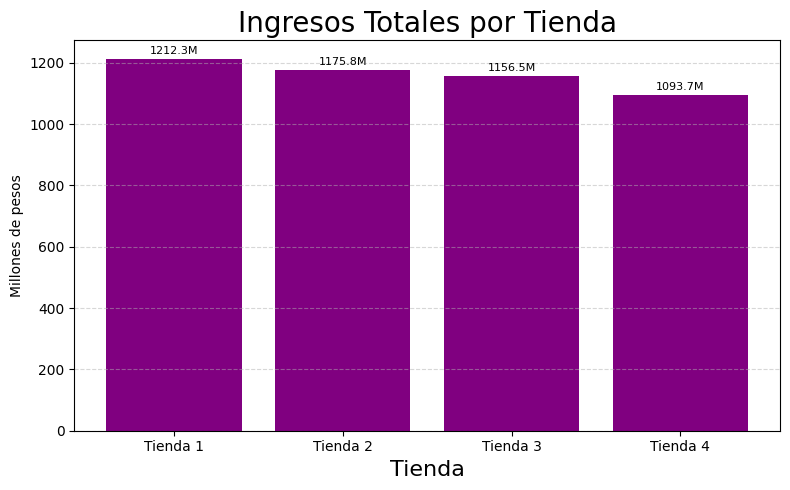

**Categorías Más Vendidas**

El gráfico muestra que:*
La categoría más vendida en general es electrónicos, lo cual sugiere una fuerte demanda.

*Otras categorías destacadas incluyen moda y hogar.



*Esto puede indicar un perfil de cliente orientado al consumo digital y doméstico.*





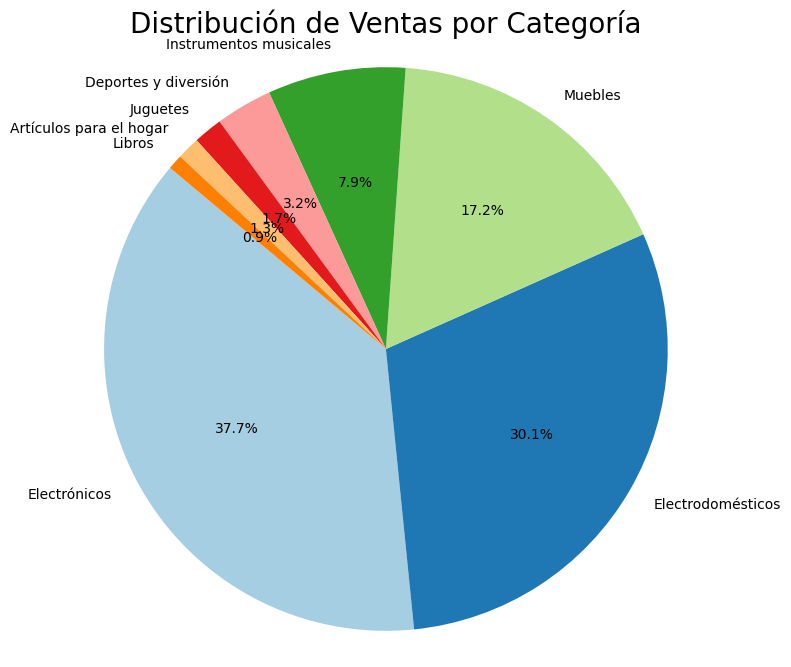

** Calificación Promedio de los Clientes**
El análisis permite determinar que:

*Tienda 1 y Tienda 3 tienen las mejores calificaciones promedio, lo cual indica alto nivel de satisfacción.

*Tienda 4 tiene la calificación más baja, lo que puede estar relacionado con servicio postventa o calidad del producto.
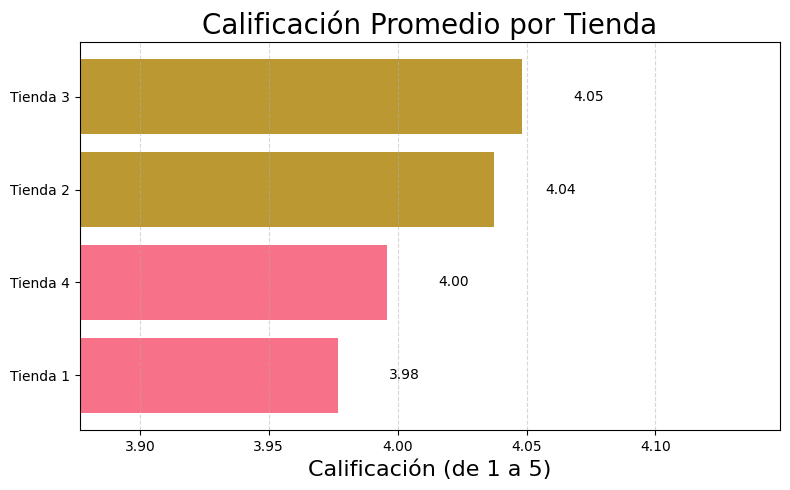

**Productos Más y Menos Vendidos**

El análisis de productos mostró que algunos artículos tienen un alto volumen constante, lo que es bueno para la visibilidad del nuevo vendedor.

Se destacó con color aquellos productos con igual número de ventas.

Los productos menos vendidos también fueron analizados para entender qué evitar o qué nichos no están funcionando.

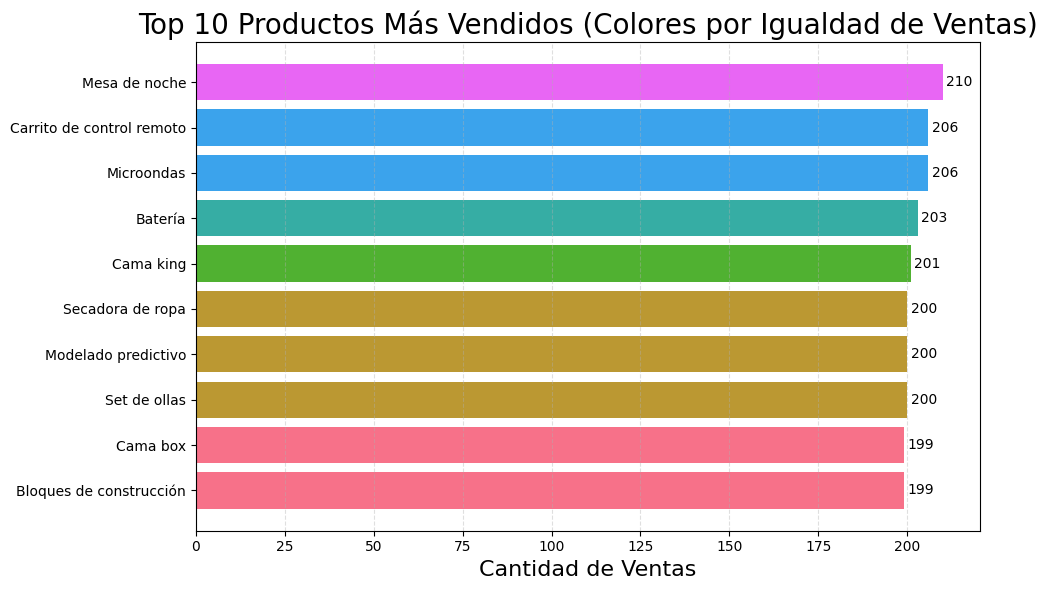
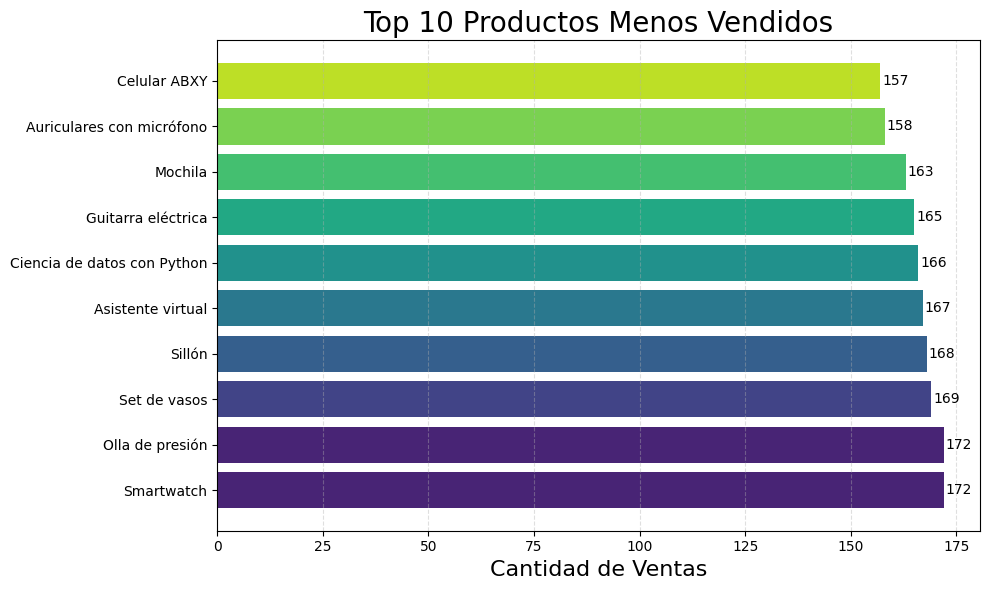

**Costo Promedio de Envío por Tienda**

Del gráfico se observa que:

*Tienda 2 presenta el costo de envío promedio más bajo, lo cual puede ser una ventaja competitiva.

*Tienda 4 tiene el costo de envío más alto, afectando posiblemente la satisfacción o volumen de ventas.
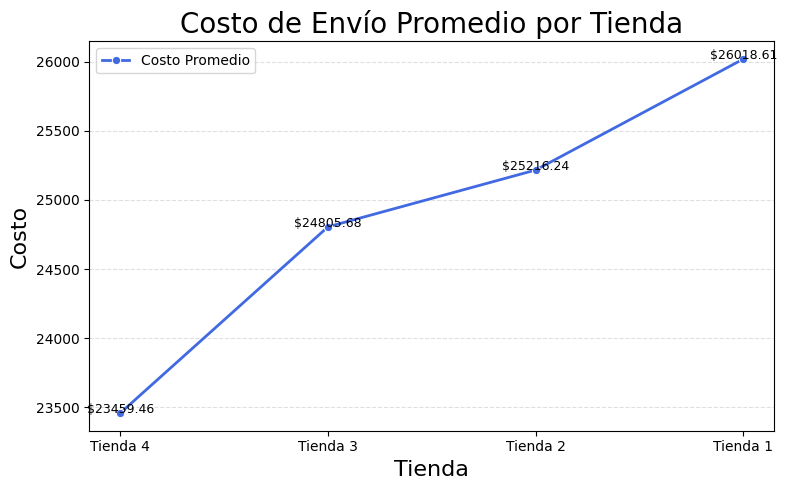

# **Conclusión y Recomendación**

---



Basado en el análisis integral de los datos, se recomienda al Sr. Juan considerar la venta de la Tienda 4.



Esto se justifica con:

1.	Menor Desempeño Financiero: La Tienda 4 es claramente la que menos ingresos genera, con una facturación total de inferior al resto de las tiendas. Esto la posiciona como la menos rentable financieramente.
2.	Menor Satisfacción del Cliente: La Tienda 4 posee la segunda calificación promedio más baja (4.00 sobre 5), superando ligeramente a la de la Tienda 1 (3.98 sobre 5) . Esto sugiere problemas subyacentes con la experiencia del cliente, la calidad del servicio o los productos ofrecidos en esa sucursal, lo que podría requerir inversiones significativas para mejorar la percepción y retención de clientes.
3.	Rendimiento General: Aunque su costo de envío promedio es el más bajo (lo cual es un punto levemente positivo), este factor no es suficiente para compensar su bajo rendimiento en las métricas cruciales de facturación y satisfacción del cliente. Su desempeño en las categorías de productos clave también es consistentemente inferior al de las tiendas de mejor rendimiento.


Si bien ninguna tienda tiene un desempeño extremadamente pobre en todas las áreas, la Tienda 4 muestra la combinación más débil de bajo rendimiento financiero y baja satisfacción del cliente, haciéndola la candidata más lógica para la venta.

 Esto permitiría al Sr. Juan liberar capital y recursos para enfocarse en las tiendas más prometedoras o en su nuevo emprendimiento.
